<a href="https://colab.research.google.com/github/DinDev3/Python-Machine-Learning/blob/master/LinearRegressionBuild.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a Linear Regression model from scratch


In [13]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')

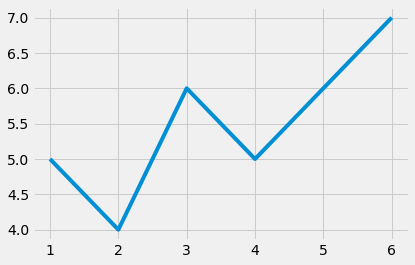

In [14]:
# xs = np.array([1,2,3,4,5,6], dtype=np.float64)   # datatype is float64 by default. Not exactly necessary for this usecase
# ys = np.array([5,4,6,5,6,7], dtype=np.float64) 

# visualizing data
plt.plot(xs, ys)      # plot a line
plt.show()

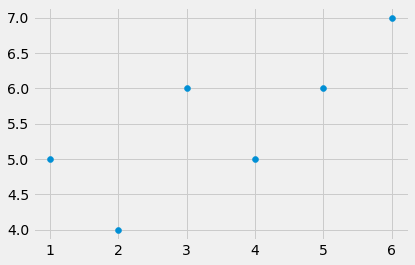

In [15]:
plt.scatter(xs, ys)     # scattered points
plt.show()

*Creating a sample dataset to Test Assumptions*

In [28]:
def create_dataset(hm, variance, step=2, correlation = False):
# hm - number of datapoints
# variance - how variable the dataset should be
# step - y value average step up value
# correlation - +ve / -ve  used to choose linear direction (increasing/ decreasing)
  val = 1   # first y value
  ys = []
  for i in range(hm):
    y = val + random.randrange(-variance, variance)
    ys.append(y)
    if correlation and correlation == 'pos':
      val += step
    elif correlation and correlation == 'neg':
      val -= step
  
  xs = [i for i in range(len(ys))]

  return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)
  

xs, ys = create_dataset(40, 40, 2, correlation= 'pos')

### Calculating the Best Fit Line & the Intercept

In [29]:
def best_fit_slope_and_intercept(xs, ys):
  # Calculating the best fit line's slope
  m = ( ((mean(xs)*mean(ys)) - mean(xs*ys)) /
      ((mean(xs)*mean(xs)) - mean(xs**2)) )
   
  # calculating the intercept of the equation
  b = mean(ys) - m*mean(xs)

  return m, b


m,b = best_fit_slope_and_intercept(xs, ys)

print("Best fit slope:",m)
print("Intercept:",b)

Best fit slope: 1.963320825515947
Intercept: 0.2902439024390375


*Displaying the regression line that has been created by the equation*

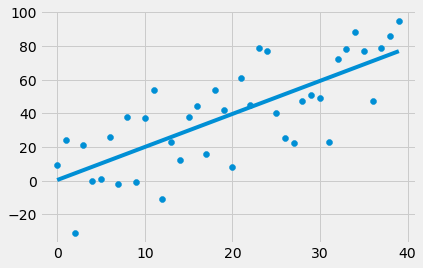

In [30]:
# taking all the known ys into an array
# for x in xs:
#   regression_line.append((m*x) + b)

regression_line = [(m*x) + b for x in xs]

plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()

### Predicting

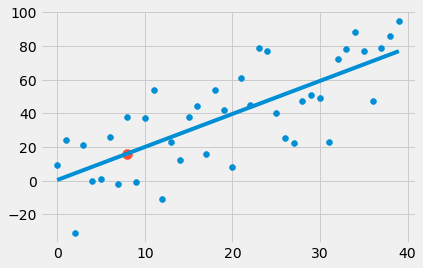

In [31]:
predict_x = 8
predict_y = (m*predict_x) + b

plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.scatter(predict_x,predict_y, s=100)    #  color='g'can be used to mark this point in green
                                          # s is for size
plt.show()

*Calculating the Accuracy of the Best-fit line*

In [32]:
# Calculating the mean squared error (e^2)
def squared_error(ys_orig, ys_line):
  return sum((ys_line - ys_orig)**2)

# Calculating the coefficient of determination (R^2)
def coefficient_of_determination(ys_orig, ys_line):
  y_mean_line = [mean(ys_orig) for y in ys_orig]    # y mean line
  squared_error_regr = squared_error(ys_orig, ys_line)      # compared to y-hat line
  squared_error_y_mean = squared_error(ys_orig, y_mean_line)

  return 1 - (squared_error_regr/squared_error_y_mean)

r_squared = coefficient_of_determination(ys, regression_line)
print("Coeffficient of Determination:",r_squared)

Coeffficient of Determination: 0.5659861742562216
